In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('ggplot')
%matplotlib inline 
pd.set_option('display.float_format', lambda x: '%.2f' % x)
pd.set_option('display.max_colwidth', 500)
pd.set_option('display.max_columns', 500)

from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [2]:
data = pd.read_csv('nyc-rolling-sales.csv')
del data['Unnamed: 0']
data.head()

,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BLOCK,LOT,EASE-MENT,BUILDING CLASS AT PRESENT,ADDRESS,APARTMENT NUMBER,ZIP CODE,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE PRICE,SALE DATE
0,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,392,6,,C2,153 AVENUE B,,10009,5,0,5,1633,6440,1900,2,C2,6625000,2017-07-19 00:00:00
1,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,399,26,,C7,234 EAST 4TH STREET,,10009,28,3,31,4616,18690,1900,2,C7,-,2016-12-14 00:00:00
2,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,399,39,,C7,197 EAST 3RD STREET,,10009,16,1,17,2212,7803,1900,2,C7,-,2016-12-09 00:00:00
3,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2B,402,21,,C4,154 EAST 7TH STREET,,10009,10,0,10,2272,6794,1913,2,C4,3936272,2016-09-23 00:00:00
4,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,404,55,,C2,301 EAST 10TH STREET,,10009,6,0,6,2369,4615,1900,2,C2,8000000,2016-11-17 00:00:00


Этот набор данных представляет собой запись о каждом здании или строительной единице, которая продается на рынке недвижимости Нью-Йорка в течение 12 месяцев.

Этот набор данных содержит местоположение, Адрес, Тип, цену продажи и дату продажи проданных строительных единиц. Ссылка на более сложные поля:

Район: цифровой код района, в котором находится объект недвижимости; по порядку это Манхэттен (1), Бронкс (2), Бруклин (3), Квинс (4) и Стейтен-Айленд (5).

Многие продажи происходят с бессмысленно маленькой суммой в долларах: чаще всего $ 0. Эти продажи фактически являются передачей документов между сторонами: например, родители передают право собственности на свой дом ребенку после переезда на пенсию Такие квартиры будут мной удалены

Очень большое количество данных находятся в плохом виде, поэтому с ними надо ознакомиться и предобработать

### 2. Провести предварительный анализ и очистку данных.

In [3]:
data['SALE DATE'] = pd.to_datetime(data['SALE DATE'])

data['LAND SQUARE FEET'] = [i.replace('-', '0') for i in data['LAND SQUARE FEET']]
data['LAND SQUARE FEET'] = data['LAND SQUARE FEET'].astype(float)

data['GROSS SQUARE FEET'] = [i.replace('-', '0') for i in data['GROSS SQUARE FEET']]
data['GROSS SQUARE FEET'] = data['GROSS SQUARE FEET'].astype(float)

data['SALE PRICE'] = [i.replace('-', '0') for i in data['SALE PRICE']]
data['SALE PRICE'] = data['SALE PRICE'].astype(float)

data['TAX CLASS AT PRESENT'] = [i.replace(' ', '0') for i in data['TAX CLASS AT PRESENT']]
data['TAX CLASS AT PRESENT'] = [i.replace('A', '').replace('B', '').replace('C', '') for i in data['TAX CLASS AT PRESENT']]
data['TAX CLASS AT PRESENT'] = [int(i) for i in data['TAX CLASS AT PRESENT']]

data['TAX CLASS AT TIME OF SALE'] = [int(i) for i in data['TAX CLASS AT TIME OF SALE']]

data.drop('APARTMENT NUMBER', axis=1, inplace=True)
data.drop('EASE-MENT', axis=1, inplace=True)
data.drop('ADDRESS', axis=1, inplace=True)

data = data[(data['SALE PRICE'] > 100000) & (data['SALE PRICE'] < 5000000)]

### 3. Провести описательную статистику.

In [4]:
data.shape

(54657, 18)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 54657 entries, 3 to 84545
Data columns (total 18 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   BOROUGH                         54657 non-null  int64         
 1   NEIGHBORHOOD                    54657 non-null  object        
 2   BUILDING CLASS CATEGORY         54657 non-null  object        
 3   TAX CLASS AT PRESENT            54657 non-null  int64         
 4   BLOCK                           54657 non-null  int64         
 5   LOT                             54657 non-null  int64         
 6   BUILDING CLASS AT PRESENT       54657 non-null  object        
 7   ZIP CODE                        54657 non-null  int64         
 8   RESIDENTIAL UNITS               54657 non-null  int64         
 9   COMMERCIAL UNITS                54657 non-null  int64         
 10  TOTAL UNITS                     54657 non-null  int64         
 11  LA

In [6]:
data.describe()

,BOROUGH,TAX CLASS AT PRESENT,BLOCK,LOT,ZIP CODE,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,SALE PRICE
count,54657.00,54657.00,54657.00,54657.00,54657.00,54657.00,54657.00,54657.00,54657.00,54657.00,54657.00,54657.00,54657.00
mean,3.00,1.57,4248.72,382.80,10746.51,1.25,0.10,1.35,1906.65,1344.15,1818.99,1.58,867034.25
std,1.31,0.66,3577.14,665.90,1172.16,9.16,9.71,13.41,23737.62,17831.77,491.02,0.65,775505.04
min,1.00,0.00,1.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,100335.00
25%,2.00,1.00,1334.00,21.00,10304.00,0.00,0.00,0.00,0.00,0.00,1920.00,1.00,397117.00
50%,3.00,2.00,3311.00,50.00,11208.00,1.00,0.00,1.00,900.00,0.00,1940.00,2.00,630000.00
75%,4.00,2.00,6257.00,1002.00,11358.00,1.00,0.00,2.00,2500.00,1800.00,1965.00,2.00,995000.00
max,5.00,4.00,16319.00,9106.00,11694.00,1844.00,2261.00,2261.00,4228300.00,3750565.00,2017.00,4.00,4996841.00


In [7]:
data.isnull().sum()

BOROUGH                           0
NEIGHBORHOOD                      0
BUILDING CLASS CATEGORY           0
TAX CLASS AT PRESENT              0
BLOCK                             0
LOT                               0
BUILDING CLASS AT PRESENT         0
ZIP CODE                          0
RESIDENTIAL UNITS                 0
COMMERCIAL UNITS                  0
TOTAL UNITS                       0
LAND SQUARE FEET                  0
GROSS SQUARE FEET                 0
YEAR BUILT                        0
TAX CLASS AT TIME OF SALE         0
BUILDING CLASS AT TIME OF SALE    0
SALE PRICE                        0
SALE DATE                         0
dtype: int64

In [8]:
data.isnull().any()

BOROUGH                           False
NEIGHBORHOOD                      False
BUILDING CLASS CATEGORY           False
TAX CLASS AT PRESENT              False
BLOCK                             False
LOT                               False
BUILDING CLASS AT PRESENT         False
ZIP CODE                          False
RESIDENTIAL UNITS                 False
COMMERCIAL UNITS                  False
TOTAL UNITS                       False
LAND SQUARE FEET                  False
GROSS SQUARE FEET                 False
YEAR BUILT                        False
TAX CLASS AT TIME OF SALE         False
BUILDING CLASS AT TIME OF SALE    False
SALE PRICE                        False
SALE DATE                         False
dtype: bool

In [9]:
print(data.duplicated().sum())
data.drop_duplicates(inplace=True)

123


In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 54534 entries, 3 to 84545
Data columns (total 18 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   BOROUGH                         54534 non-null  int64         
 1   NEIGHBORHOOD                    54534 non-null  object        
 2   BUILDING CLASS CATEGORY         54534 non-null  object        
 3   TAX CLASS AT PRESENT            54534 non-null  int64         
 4   BLOCK                           54534 non-null  int64         
 5   LOT                             54534 non-null  int64         
 6   BUILDING CLASS AT PRESENT       54534 non-null  object        
 7   ZIP CODE                        54534 non-null  int64         
 8   RESIDENTIAL UNITS               54534 non-null  int64         
 9   COMMERCIAL UNITS                54534 non-null  int64         
 10  TOTAL UNITS                     54534 non-null  int64         
 11  LA

### 4. Построить тепловую карту корреляции.

In [11]:
data.corr()['SALE PRICE'].sort_values(ascending=False)

SALE PRICE                   1.00
TAX CLASS AT TIME OF SALE    0.22
TAX CLASS AT PRESENT         0.20
LOT                          0.20
RESIDENTIAL UNITS            0.03
TOTAL UNITS                  0.02
GROSS SQUARE FEET            0.02
LAND SQUARE FEET             0.01
COMMERCIAL UNITS             0.00
YEAR BUILT                  -0.07
ZIP CODE                    -0.15
BLOCK                       -0.32
BOROUGH                     -0.35
Name: SALE PRICE, dtype: float64

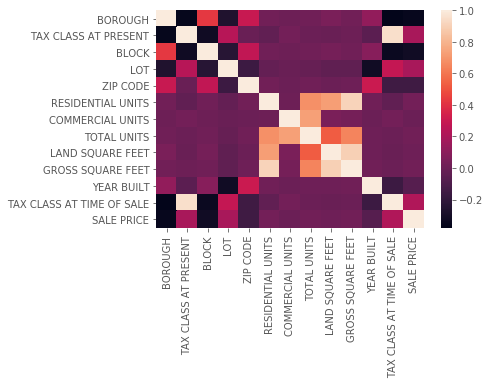

In [12]:
sns.heatmap(data.corr())

### 5. Построить матрицы рассеивания.

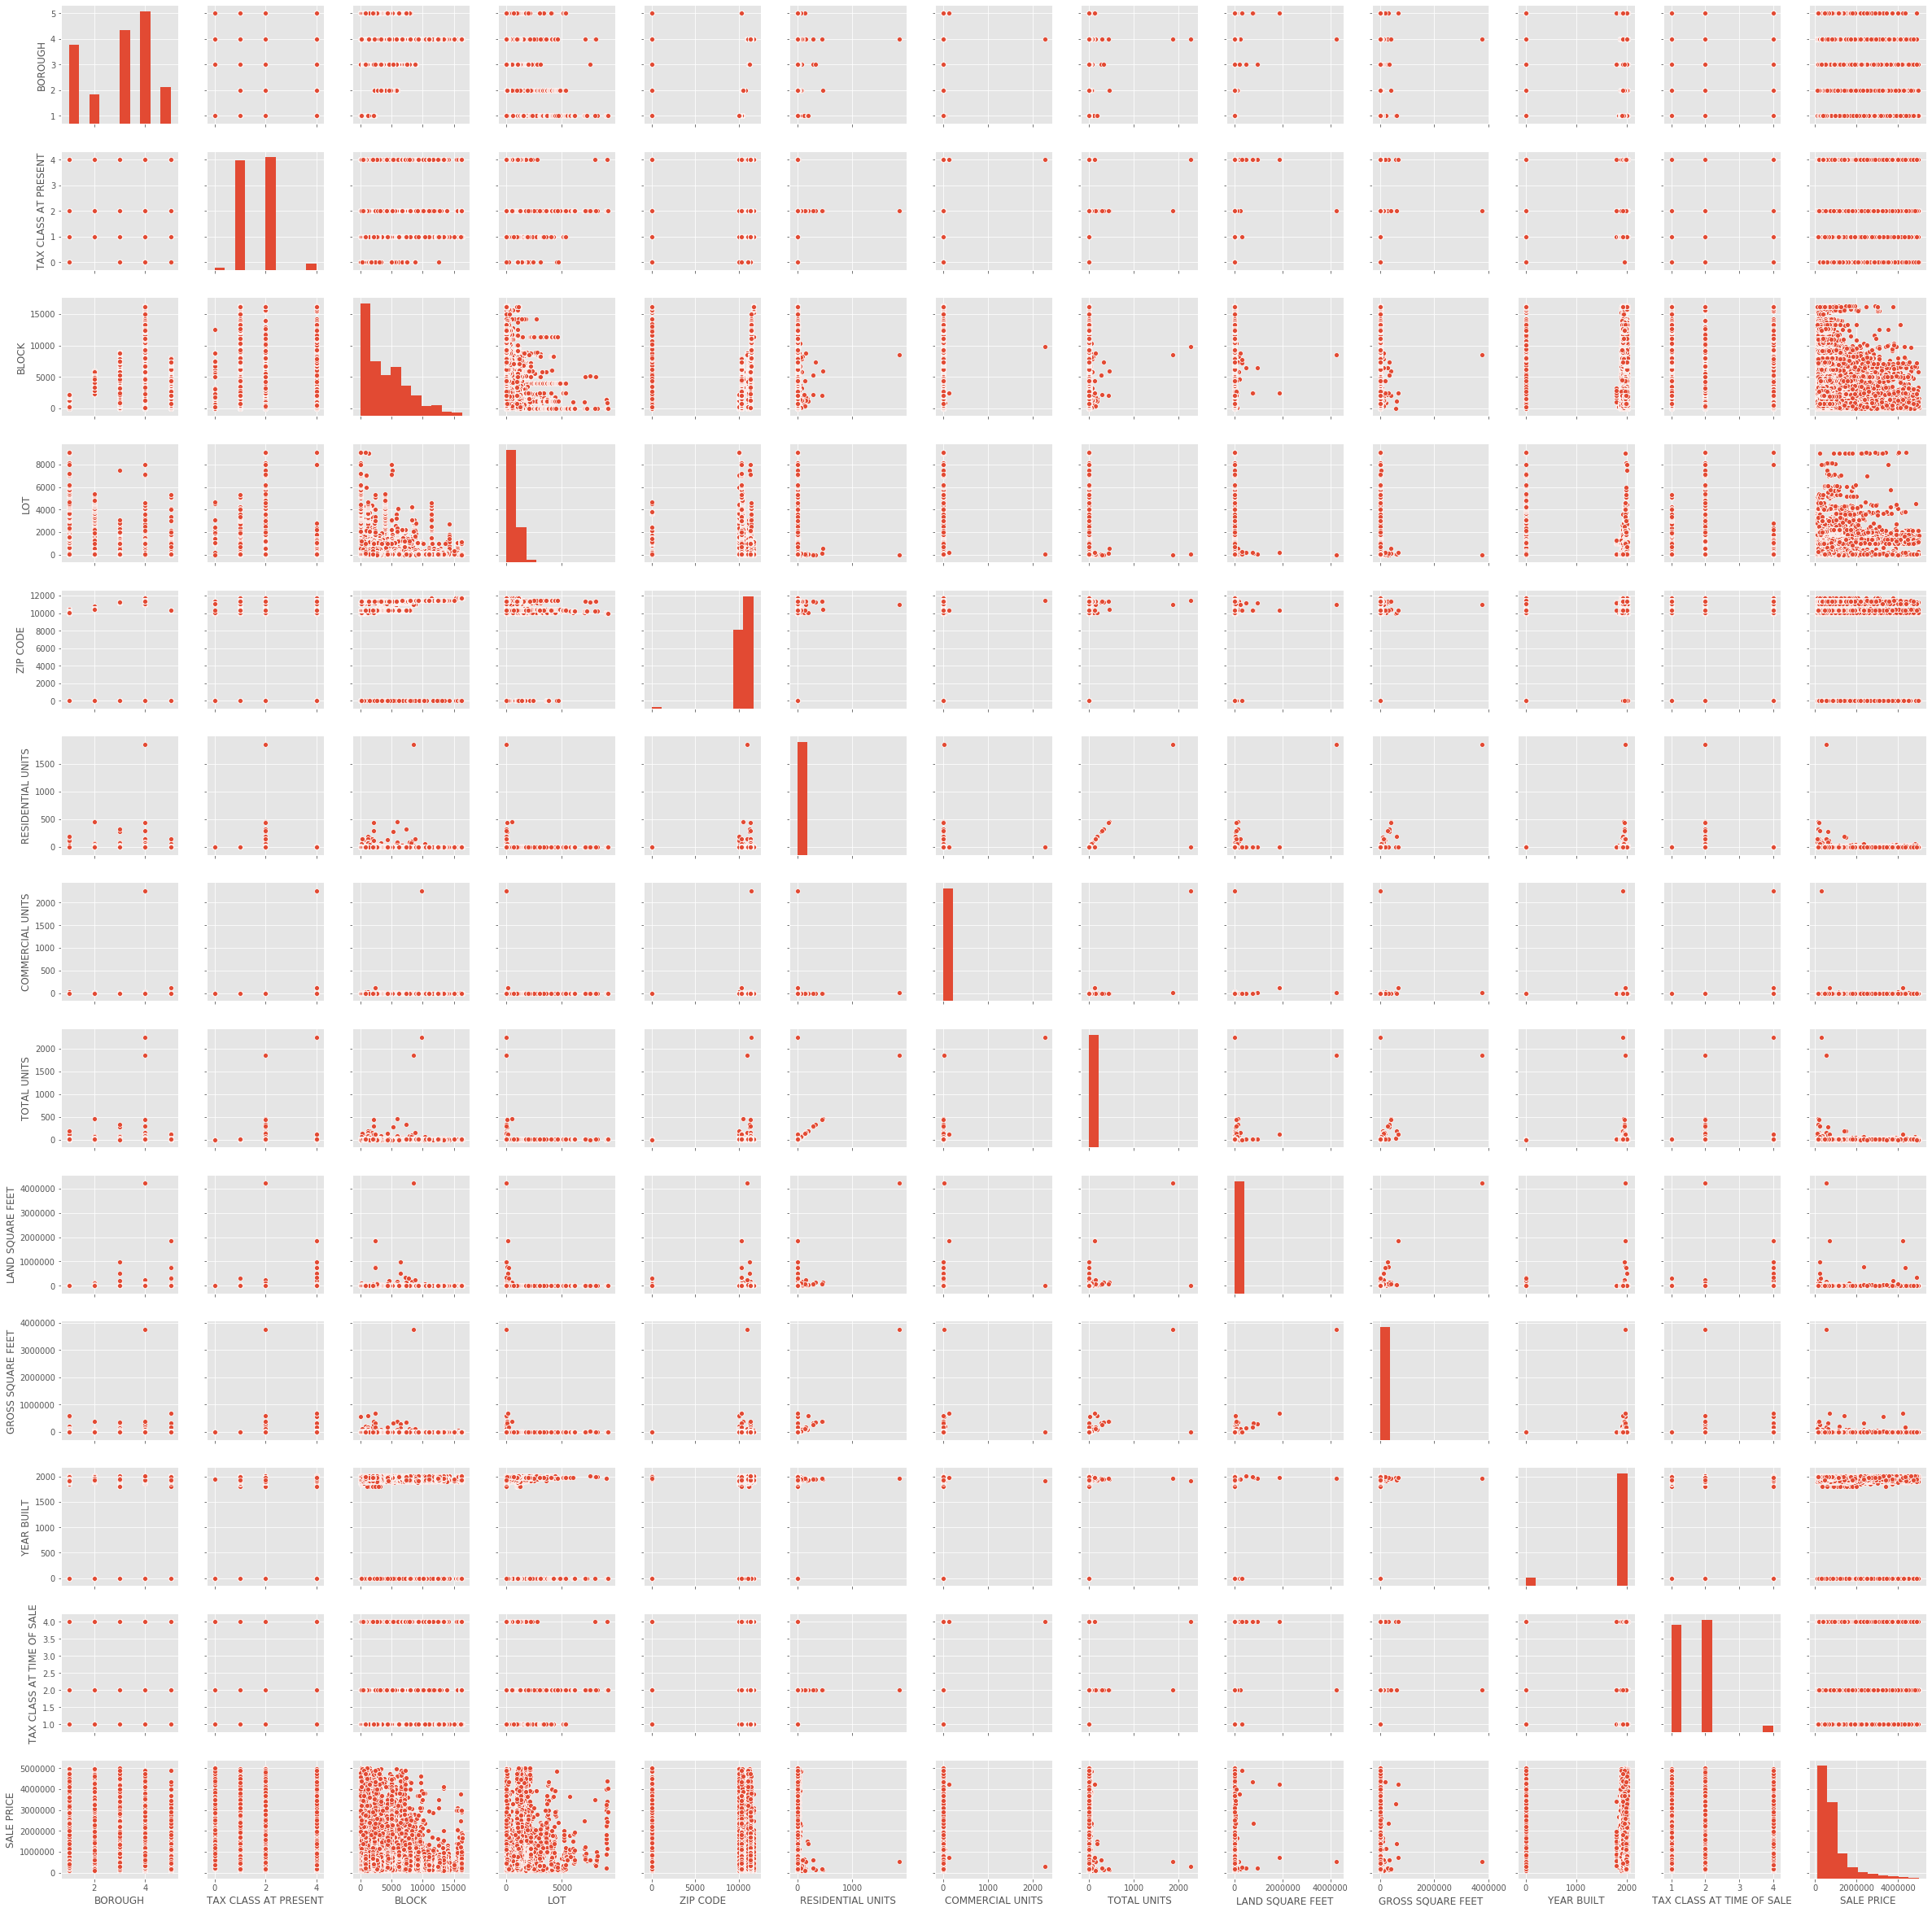

In [13]:
sns.pairplot(data)

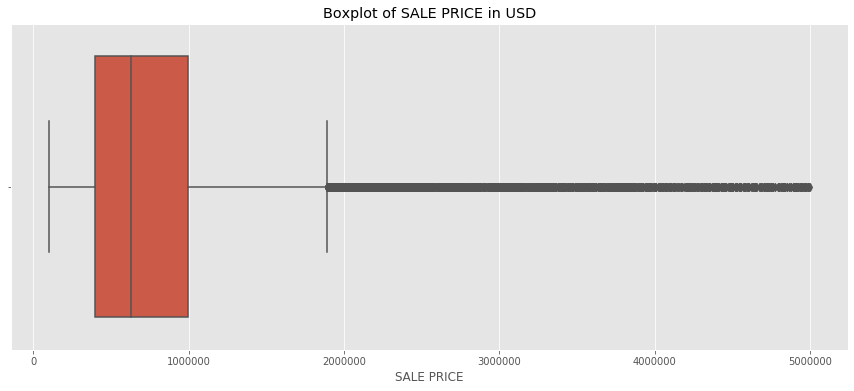

In [14]:
plt.figure(figsize=(15,6))

sns.boxplot(x='SALE PRICE', data=data)
plt.ticklabel_format(style='plain', axis='x')
plt.title('Boxplot of SALE PRICE in USD')
plt.show()

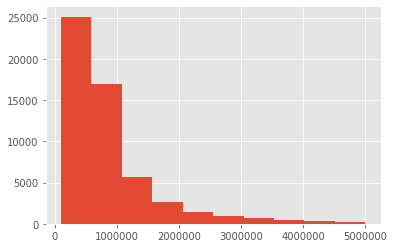

In [15]:
data['SALE PRICE'].hist()

In [16]:
data.shape

(54534, 18)

### 6. Работа по вариантам.

#### Вариант 2. Решить задачу регрессии.

In [17]:
data_boost = data.copy()

In [18]:
cat_cols = np.where(data.dtypes == 'object')
print(list(data.columns[cat_cols]))
for col in list(data.columns[cat_cols]):
    data[col] = le.fit_transform(data[col])

['NEIGHBORHOOD', 'BUILDING CLASS CATEGORY', 'BUILDING CLASS AT PRESENT', 'BUILDING CLASS AT TIME OF SALE']


In [19]:
data.head()

,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BLOCK,LOT,BUILDING CLASS AT PRESENT,ZIP CODE,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE PRICE,SALE DATE
3,1,1,6,2,402,21,18,10009,10,0,10,2272.00,6794.00,1913,2,17,3936272.00,2016-09-23
6,1,1,6,2,406,32,18,10009,8,0,8,1750.00,4226.00,1920,2,17,3192840.00,2016-09-23
13,1,1,8,2,373,40,20,10009,0,0,0,0.00,0.00,1920,2,19,499000.00,2017-03-10
15,1,1,8,2,373,40,20,10009,0,0,0,0.00,0.00,1920,2,19,529500.00,2017-06-09
16,1,1,8,2,373,40,20,10009,0,0,0,0.00,0.00,1920,2,19,423000.00,2017-07-14


### 7. Для решения задачи необходимо использовать и обучить несколько моделей, проанализировать результаты, сделать выводы. Выбрать наиболее перспективную модель для решения выбранной задачи.

Несколько моделей обучить не успеваю ввиду долгой обработки и большого датасета, однако уверен, что CatBoost покажет наилучший результат

### 8. Провести поиск оптимальных параметров, использовать Grid Search.

Наиболее оптимальные параметры также не успеваю подобрать, однако есть шанс показать лучшие ***фичи***

In [20]:
X = data_boost.drop('SALE PRICE', axis=1)
y = data_boost['SALE PRICE']

In [24]:
from catboost import CatBoostRegressor
from sklearn.model_selection import train_test_split

In [25]:
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size =.2, random_state=13)

In [26]:
cbr = CatBoostRegressor(     depth=4,
                             iterations=2100,
                             #learning_rate=0.1,
                             #l2_leaf_reg = 50,
                             border_count = 254,
                             bagging_temperature = 1,
                             eval_metric='MAE',
                             loss_function = 'MAE',
                             random_seed = 13,
                             od_type='Iter',
                             metric_period = 75,
                             od_wait=200)

In [27]:
cbr.fit(X_train, y_train,
             eval_set=(X_valid,y_valid),
             use_best_model=True,
             cat_features=data_boost.columns[cat_cols],
             verbose=True)

0:	learn: 475727.1859485	test: 471768.6148794	best: 471768.6148794 (0)	total: 103ms	remaining: 3m 36s
75:	learn: 338541.1541501	test: 334960.8673953	best: 334960.8673953 (75)	total: 2.13s	remaining: 56.7s
150:	learn: 322973.5508024	test: 320982.0545973	best: 320982.0545973 (150)	total: 4.91s	remaining: 1m 3s
225:	learn: 316808.9296013	test: 315335.1049718	best: 315335.1049718 (225)	total: 7.64s	remaining: 1m 3s
300:	learn: 312154.6374813	test: 310863.9984028	best: 310863.9984028 (300)	total: 10.2s	remaining: 1m 1s
375:	learn: 307219.9928413	test: 306150.9676809	best: 306150.9676809 (375)	total: 13.1s	remaining: 1m
450:	learn: 302699.2483926	test: 302023.2029845	best: 302023.2029845 (450)	total: 16s	remaining: 58.5s
525:	learn: 299557.7158742	test: 299132.1623224	best: 299132.1623224 (525)	total: 18.8s	remaining: 56.3s
600:	learn: 297003.6837284	test: 296802.4405139	best: 296802.4405139 (600)	total: 21.5s	remaining: 53.6s
675:	learn: 294629.6510002	test: 294374.4150839	best: 294374.4150

### 9. Провести оценку качества моделирования с использованием различных метрик.

In [28]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [29]:
print('mean_absolute_error: ', mean_absolute_error(y_valid, cbr.predict(X_valid))),
print('mean_squared_error: ', mean_squared_error(y_valid, cbr.predict(X_valid))),
print('r2_score: ', r2_score(y_valid, cbr.predict(X_valid)))

mean_absolute_error:  275941.7553038399
mean_squared_error:  261009020588.54996
r2_score:  0.5683303766658141


### 10. Фичи

In [31]:
def perform_model(X_train, y_train,X_valid, y_valid):
    model = CatBoostRegressor(     depth=4,
                             iterations=2100,
                             #learning_rate=0.02,
                             l2_leaf_reg = 3,
                             border_count = 254,
                             bagging_temperature = 1,
                             eval_metric='MAE',
                             loss_function = 'MAE',
                             random_seed = 13,
                             od_type='Iter',
                             metric_period = 75,
                             od_wait=200)
    
    model.fit(X_train, y_train,
             eval_set=(X_valid,y_valid),
             use_best_model=True,
             cat_features=data_boost.columns[cat_cols],
             verbose=True
    )
    
    print("MAE on training data: "+ model.score(X_train, y_train).astype(str))
    print("MAE AUC on valid data: "+ model.score(X_valid, y_valid).astype(str))

    return model
    

In [32]:
model=perform_model(X_train, y_train,X_valid, y_valid)

0:	learn: 475727.1859485	test: 471768.6148794	best: 471768.6148794 (0)	total: 48.7ms	remaining: 1m 42s
75:	learn: 338541.1541501	test: 334960.8673953	best: 334960.8673953 (75)	total: 2.01s	remaining: 53.5s
150:	learn: 322973.5508024	test: 320982.0545973	best: 320982.0545973 (150)	total: 4.85s	remaining: 1m 2s
225:	learn: 316808.9296013	test: 315335.1049718	best: 315335.1049718 (225)	total: 7.52s	remaining: 1m 2s
300:	learn: 312154.6374813	test: 310863.9984028	best: 310863.9984028 (300)	total: 10.2s	remaining: 1m
375:	learn: 307219.9928413	test: 306150.9676809	best: 306150.9676809 (375)	total: 12.9s	remaining: 59.1s
450:	learn: 302699.2483926	test: 302023.2029845	best: 302023.2029845 (450)	total: 15.7s	remaining: 57.3s
525:	learn: 299557.7158742	test: 299132.1623224	best: 299132.1623224 (525)	total: 18.4s	remaining: 55.1s
600:	learn: 297003.6837284	test: 296802.4405139	best: 296802.4405139 (600)	total: 21.1s	remaining: 52.6s
675:	learn: 294629.6510002	test: 294374.4150839	best: 294374.4

In [33]:
from catboost import Pool
feature_score = pd.DataFrame(list(zip(X.dtypes.index, model.get_feature_importance(Pool(X, label=y, cat_features=data_boost.columns[cat_cols])))),
                columns=['Feature','Score'])

feature_score = feature_score.sort_values(by='Score', ascending=False, inplace=False, kind='quicksort', na_position='last')

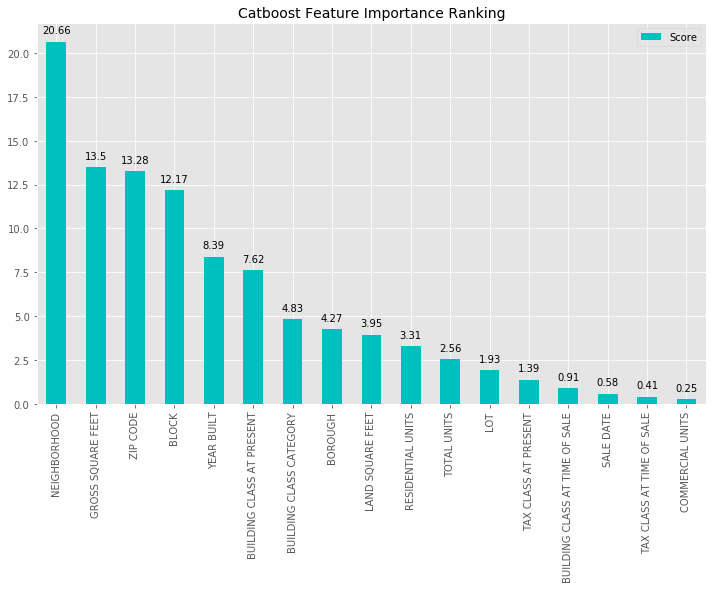

In [34]:
plt.rcParams["figure.figsize"] = (12,7)
ax = feature_score.plot('Feature', 'Score', kind='bar', color='c')
ax.set_title("Catboost Feature Importance Ranking", fontsize = 14)
ax.set_xlabel('')

rects = ax.patches

labels = feature_score['Score'].round(2)

for rect, label in zip(rects, labels):
    height = rect.get_height()
    ax.text(rect.get_x() + rect.get_width()/2, height + 0.35, label, ha='center', va='bottom')

plt.show()